In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [2]:
data=pd.read_csv("synthetic_insurance_data.csv")
data.head(5)

,Age,Is_Senior,Marital_Status,Married_Premium_Discount,Prior_Insurance,Prior_Insurance_Premium_Adjustment,Claims_Frequency,Claims_Severity,Claims_Adjustment,Policy_Type,...,Time_Since_First_Contact,Conversion_Status,Website_Visits,Inquiries,Quotes_Requested,Time_to_Conversion,Credit_Score,Premium_Adjustment_Credit,Region,Premium_Adjustment_Region
0,47,0,Married,86,1-5 years,50,0,Low,0,Full Coverage,...,10,0,5,1,2,99,704,-50,Suburban,50
1,37,0,Married,86,1-5 years,50,0,Low,0,Full Coverage,...,22,0,5,1,2,99,726,-50,Urban,100
2,49,0,Married,86,1-5 years,50,1,Low,50,Full Coverage,...,28,0,4,4,1,99,772,-50,Urban,100
3,62,1,Married,86,>5 years,0,1,Low,50,Full Coverage,...,4,1,6,2,2,2,809,-50,Urban,100
4,36,0,Single,0,>5 years,0,2,Low,100,Full Coverage,...,14,1,8,4,2,10,662,50,Suburban,50


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 10000 non-null  int64 
 1   Is_Senior                           10000 non-null  int64 
 2   Marital_Status                      10000 non-null  object
 3   Married_Premium_Discount            10000 non-null  int64 
 4   Prior_Insurance                     10000 non-null  object
 5   Prior_Insurance_Premium_Adjustment  10000 non-null  int64 
 6   Claims_Frequency                    10000 non-null  int64 
 7   Claims_Severity                     10000 non-null  object
 8   Claims_Adjustment                   10000 non-null  int64 
 9   Policy_Type                         10000 non-null  object
 10  Policy_Adjustment                   10000 non-null  int64 
 11  Premium_Amount                      10000 non-null  int

In [4]:
data.describe()

,Age,Is_Senior,Married_Premium_Discount,Prior_Insurance_Premium_Adjustment,Claims_Frequency,Claims_Adjustment,Policy_Adjustment,Premium_Amount,Safe_Driver_Discount,Multi_Policy_Discount,...,Total_Discounts,Time_Since_First_Contact,Conversion_Status,Website_Visits,Inquiries,Quotes_Requested,Time_to_Conversion,Credit_Score,Premium_Adjustment_Credit,Premium_Adjustment_Region
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,39.991700,0.159300,42.131400,47.625000,0.497200,36.780000,-79.860000,2219.571400,0.199900,0.305100,...,30.110000,15.478000,0.576700,5.022900,1.996900,1.996900,46.07320,714.253400,-11.320000,64.325000
std,14.050358,0.365974,42.993376,34.354438,0.716131,65.910288,97.955806,148.521132,0.399945,0.460473,...,33.689782,8.677975,0.494107,2.238231,1.415588,0.817409,45.44845,49.749487,48.704156,39.232618
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,1800.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.00000,530.000000,-50.000000,0.000000
25%,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,2100.000000,0.000000,0.000000,...,0.000000,8.000000,0.000000,3.000000,1.000000,1.000000,6.00000,681.000000,-50.000000,50.000000
50%,39.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,2236.000000,0.000000,0.000000,...,50.000000,16.000000,1.000000,5.000000,2.000000,2.000000,12.00000,715.000000,-50.000000,50.000000
75%,50.000000,0.000000,86.000000,50.000000,1.000000,50.000000,0.000000,2336.000000,0.000000,1.000000,...,50.000000,23.000000,1.000000,6.000000,3.000000,3.000000,99.00000,748.000000,50.000000,100.000000
max,90.000000,1.000000,86.000000,100.000000,5.000000,800.000000,0.000000,2936.000000,1.000000,1.000000,...,150.000000,30.000000,1.000000,16.000000,9.000000,3.000000,99.00000,850.000000,50.000000,100.000000


# Checking null values and Duplicated entries

In [5]:
data.isnull().sum()

Age                                   0
Is_Senior                             0
Marital_Status                        0
Married_Premium_Discount              0
Prior_Insurance                       0
Prior_Insurance_Premium_Adjustment    0
Claims_Frequency                      0
Claims_Severity                       0
Claims_Adjustment                     0
Policy_Type                           0
Policy_Adjustment                     0
Premium_Amount                        0
Safe_Driver_Discount                  0
Multi_Policy_Discount                 0
Bundling_Discount                     0
Total_Discounts                       0
Source_of_Lead                        0
Time_Since_First_Contact              0
Conversion_Status                     0
Website_Visits                        0
Inquiries                             0
Quotes_Requested                      0
Time_to_Conversion                    0
Credit_Score                          0
Premium_Adjustment_Credit             0


In [6]:
data.duplicated().sum()

0

# Label Encoding

In [7]:
le=LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col])

# Correlation among the features

<Axes: >

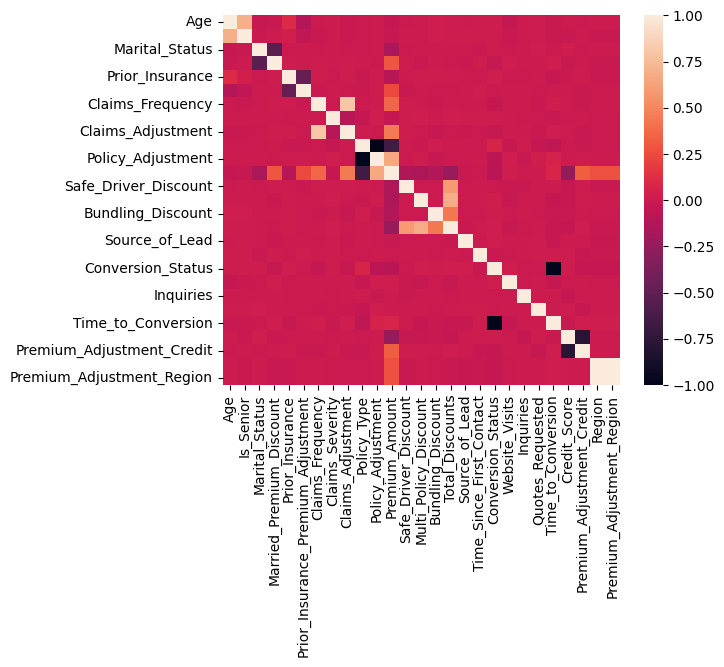

In [8]:
sns.heatmap(data.corr())

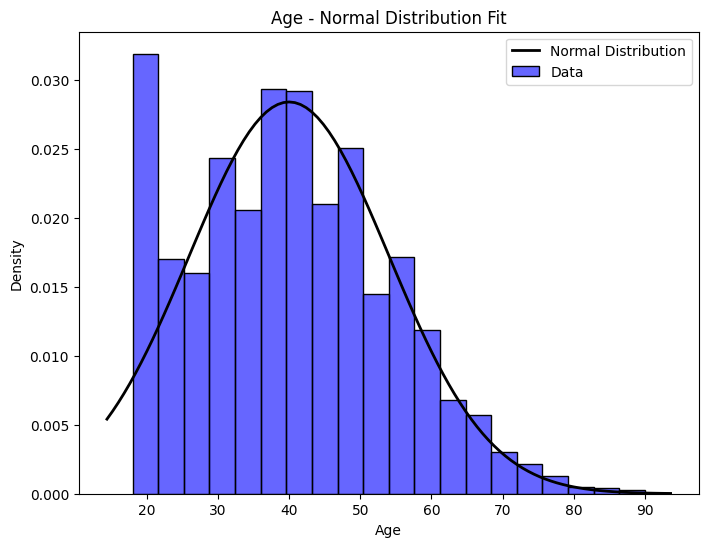

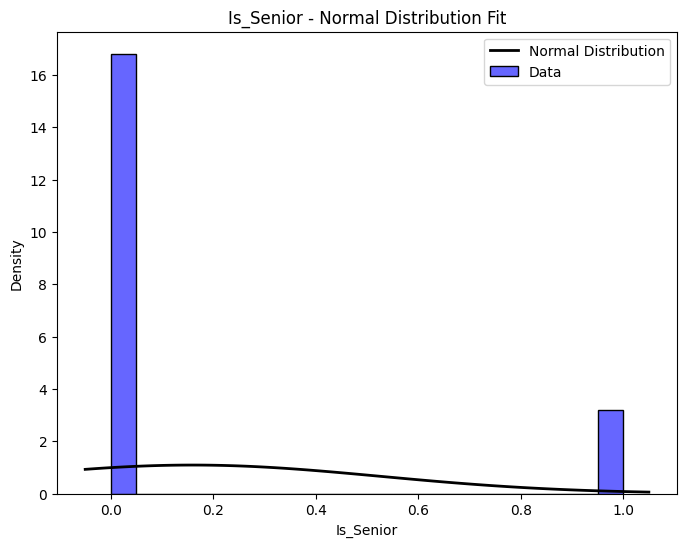

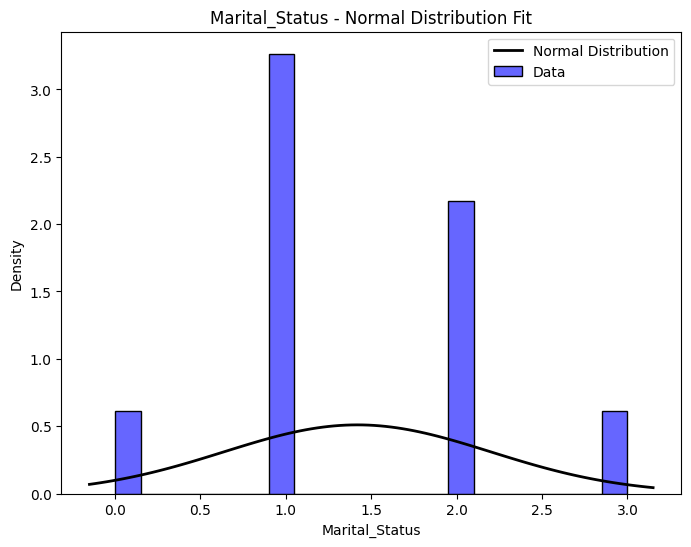

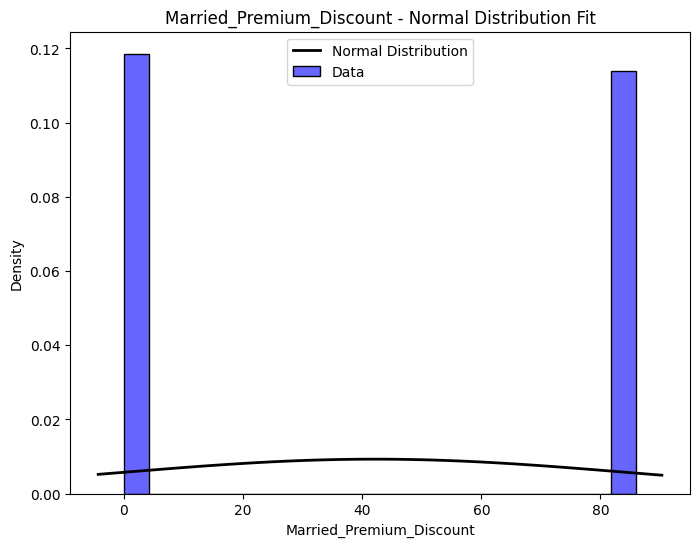

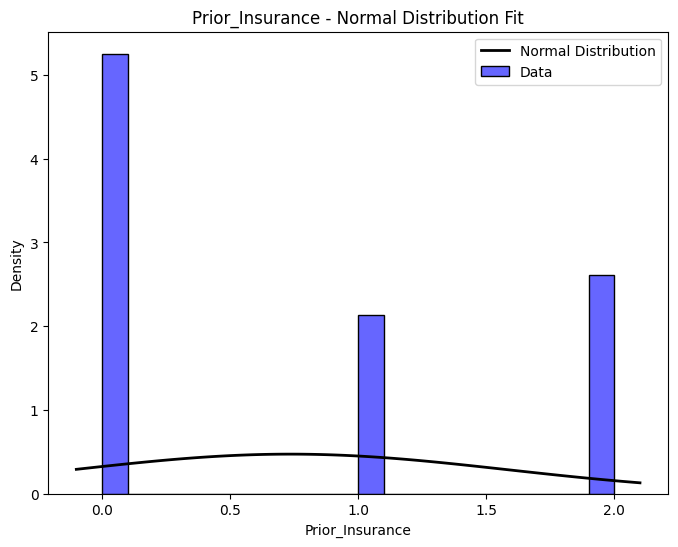

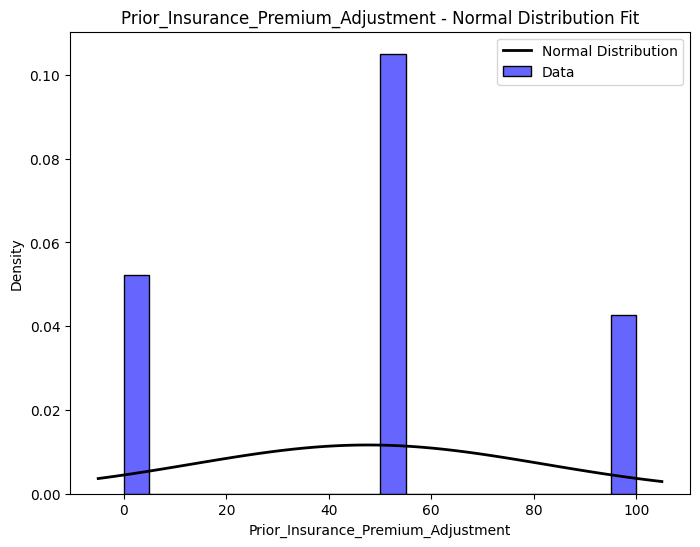

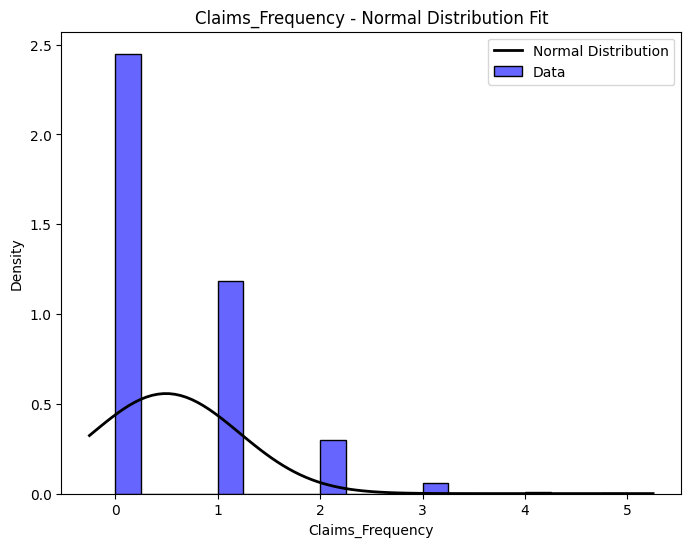

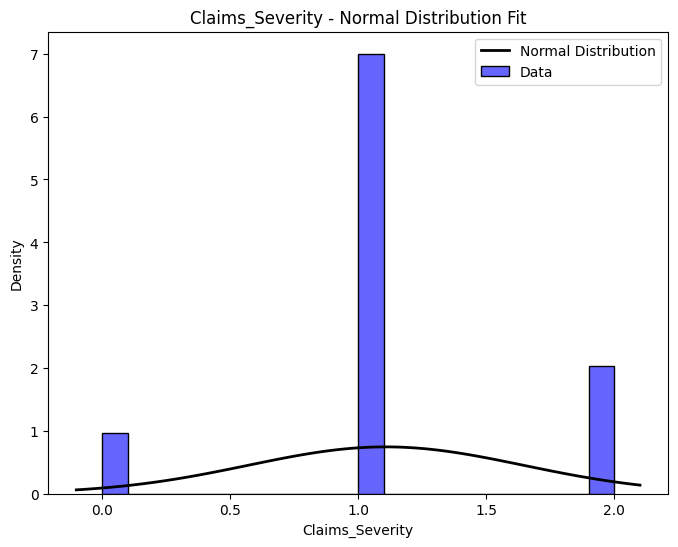

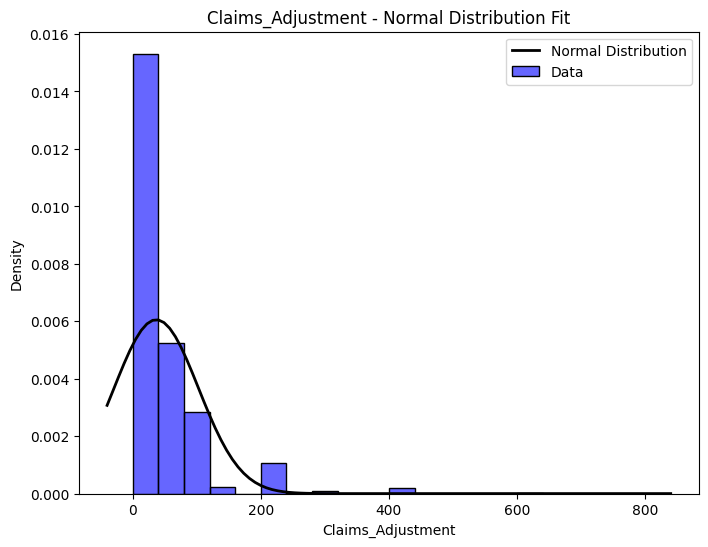

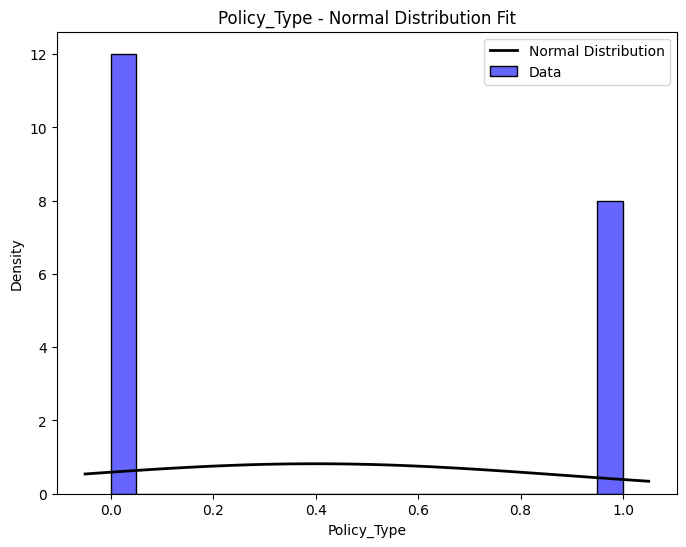

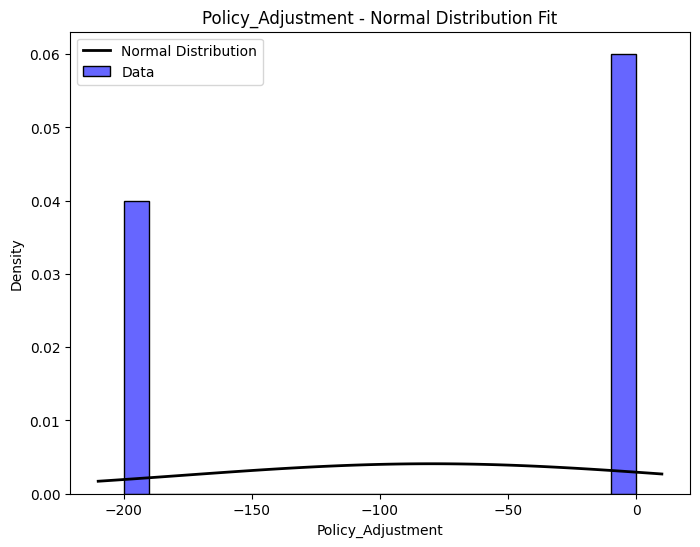

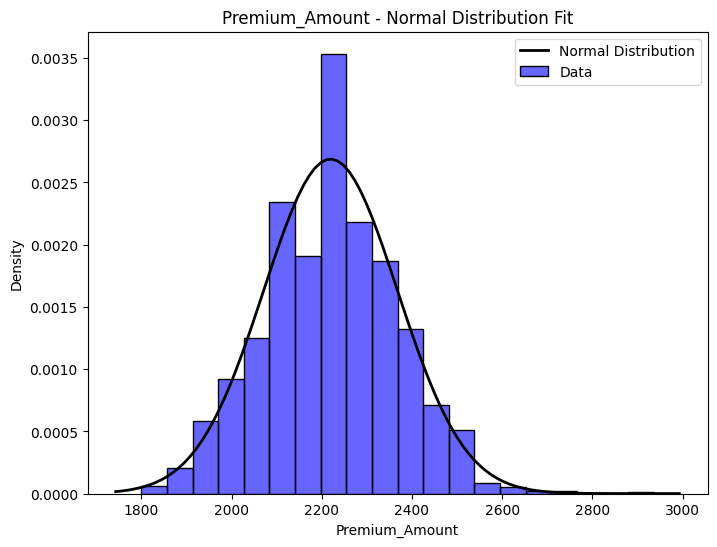

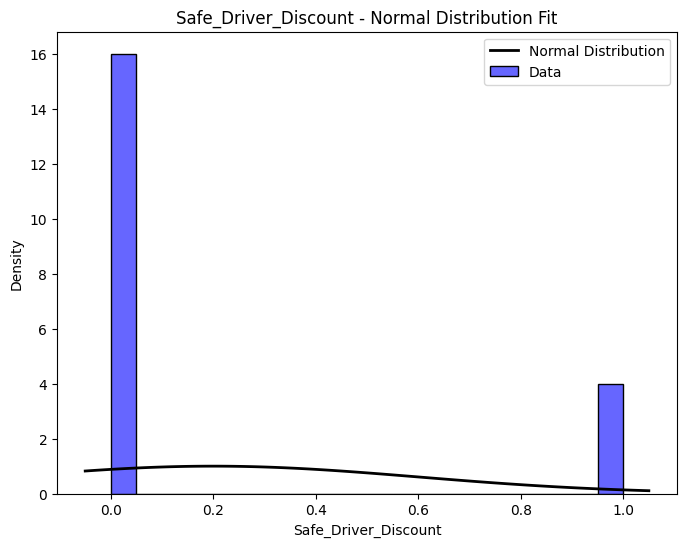

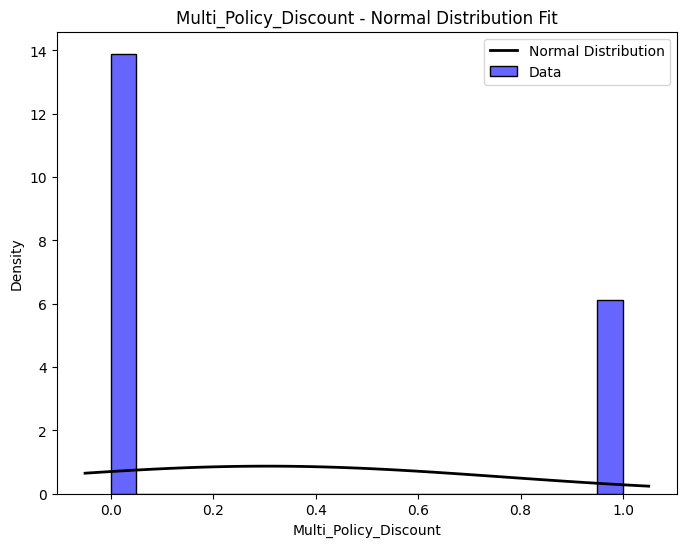

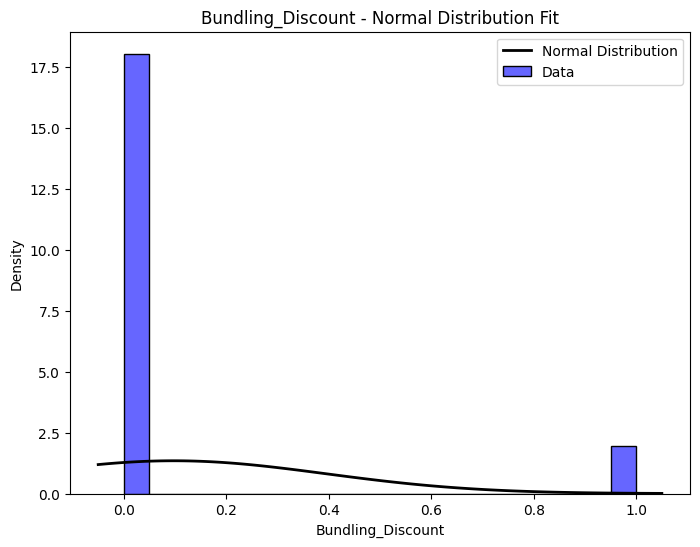

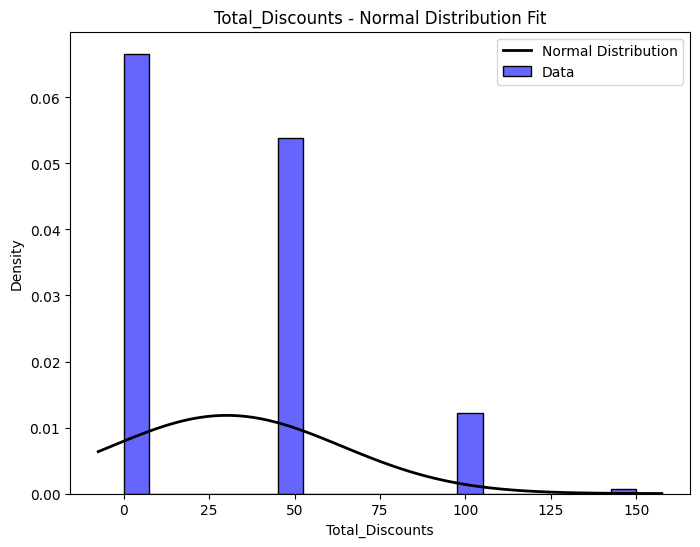

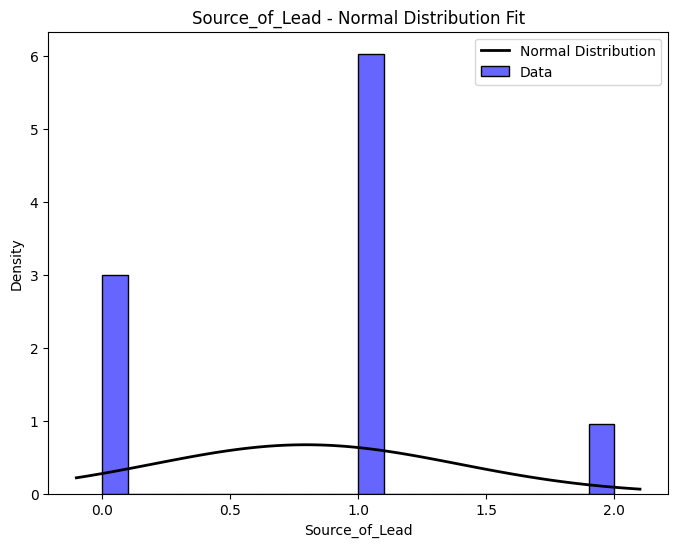

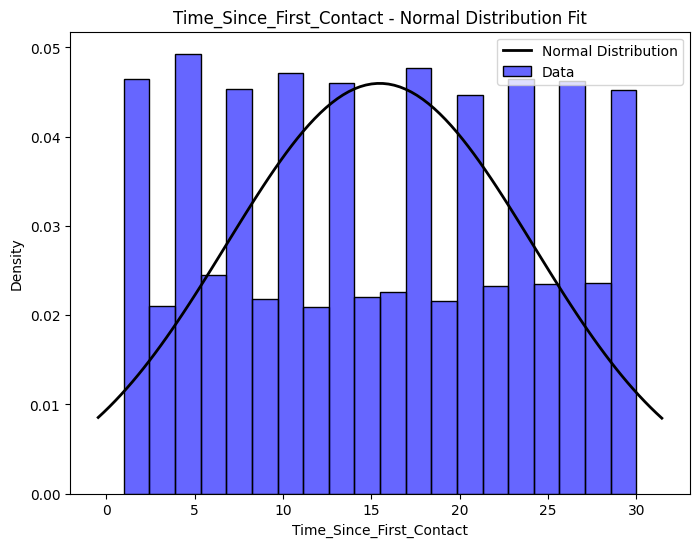

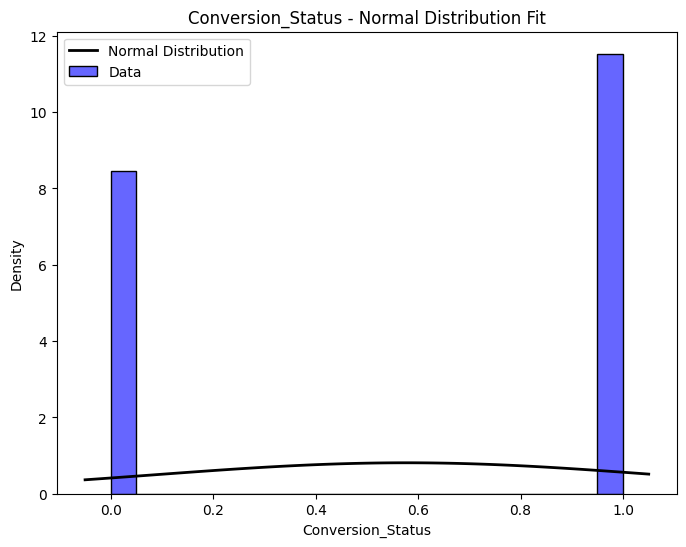

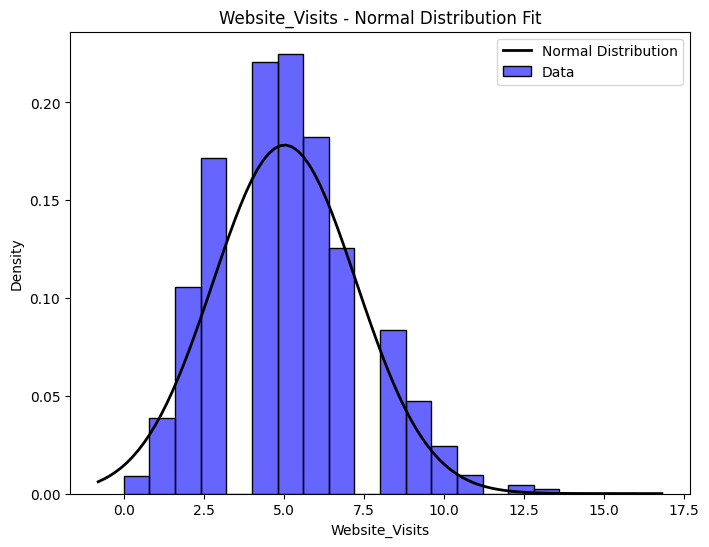

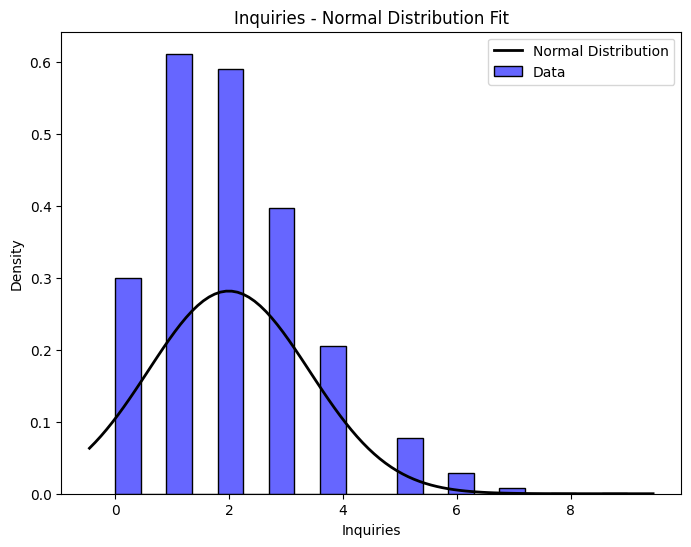

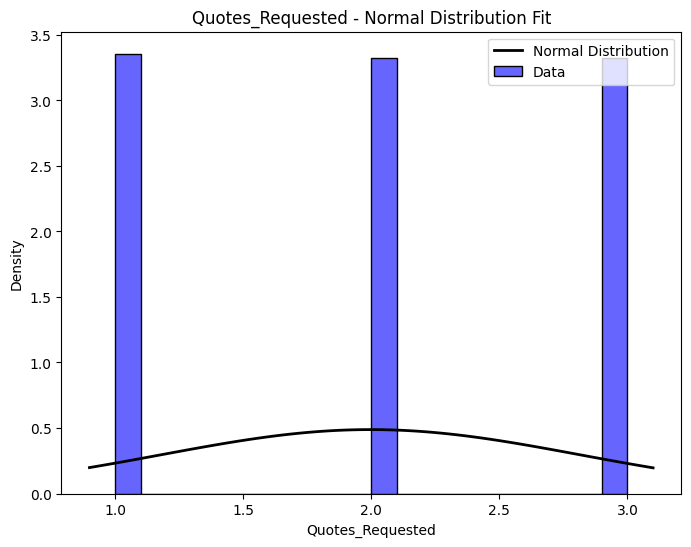

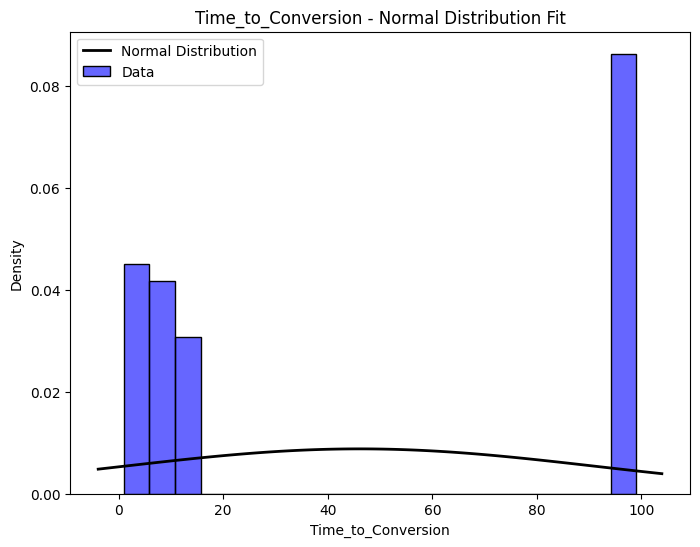

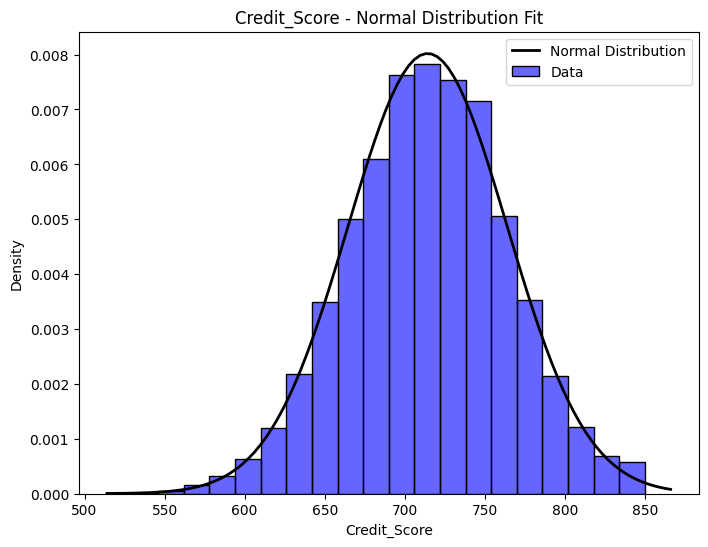

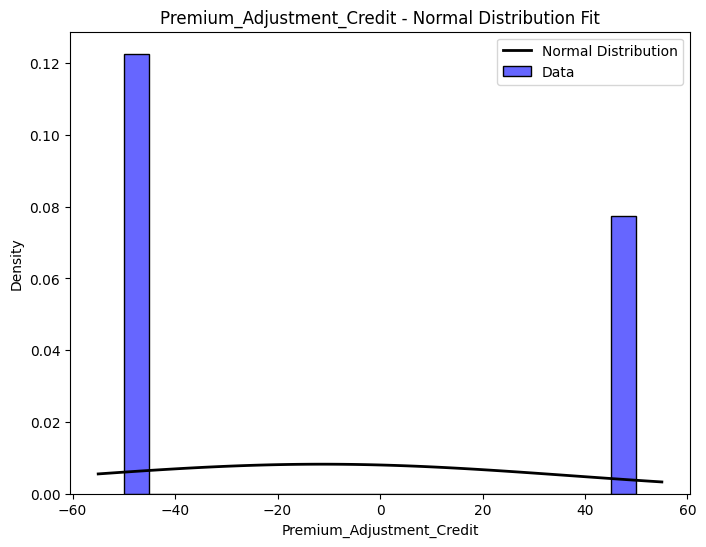

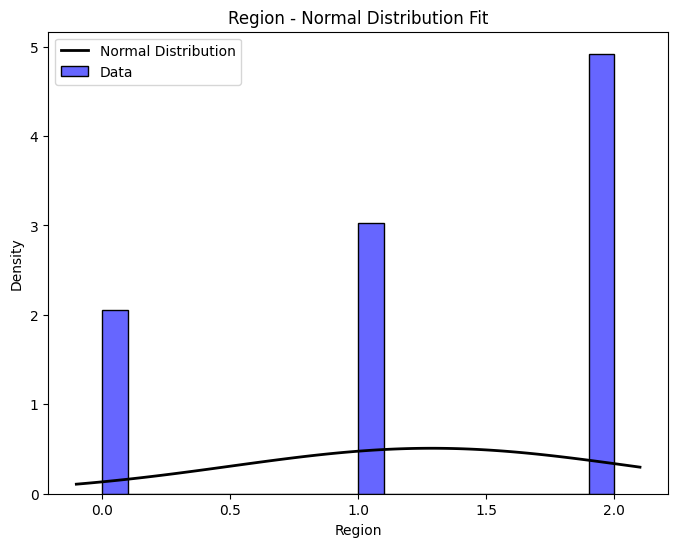

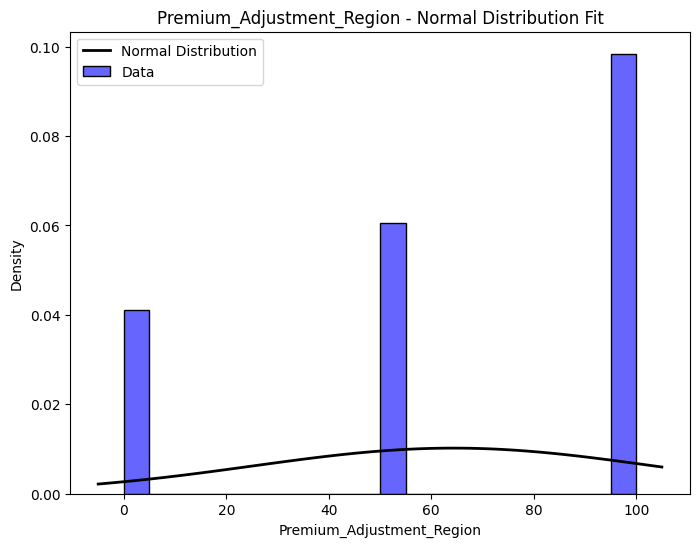

In [9]:
import scipy.stats as stats
import numpy as np
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], bins=20, kde=False, color='blue', stat='density', label='Data', alpha=0.6)
    
    mean = data[col].mean()
    std = data[col].std()
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mean, std)
    
    plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')
    plt.title(f'{col} - Normal Distribution Fit')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.show()


# Detecting Outliers

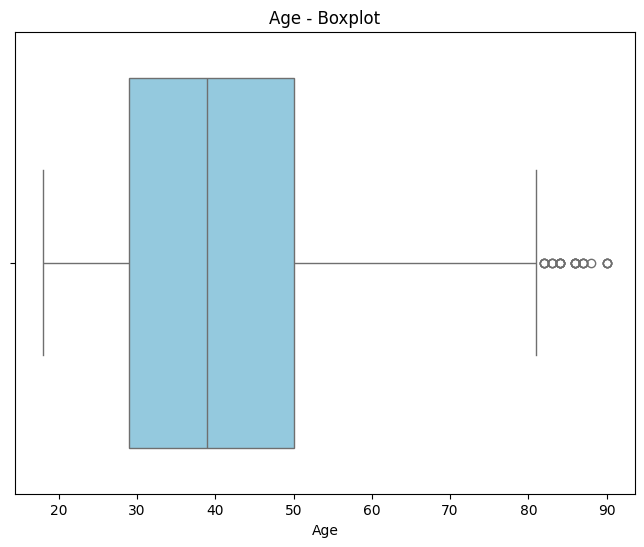

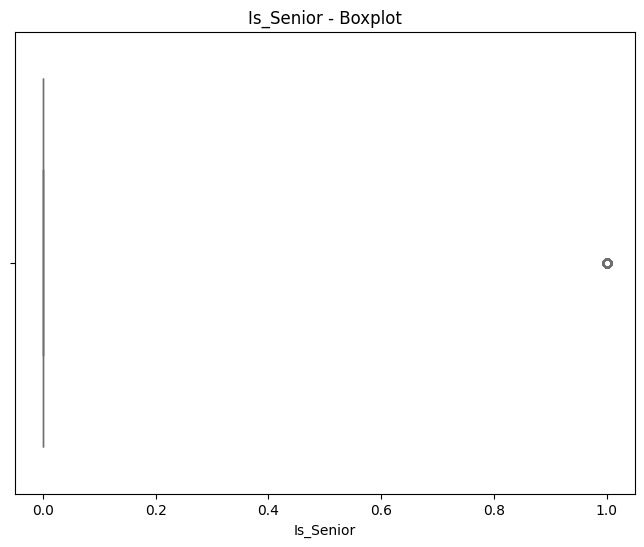

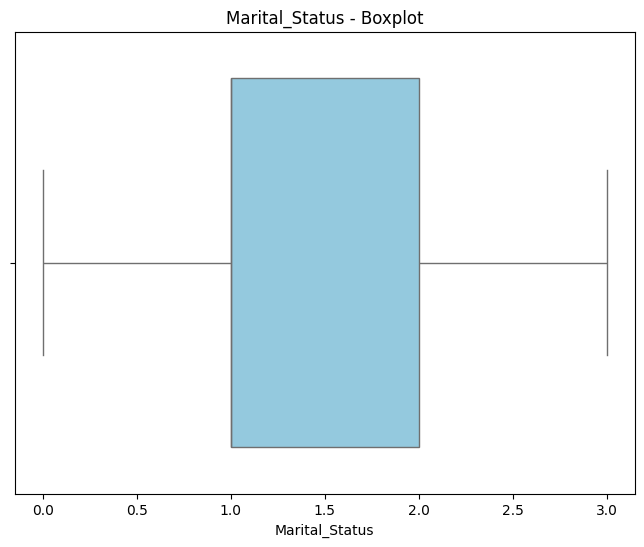

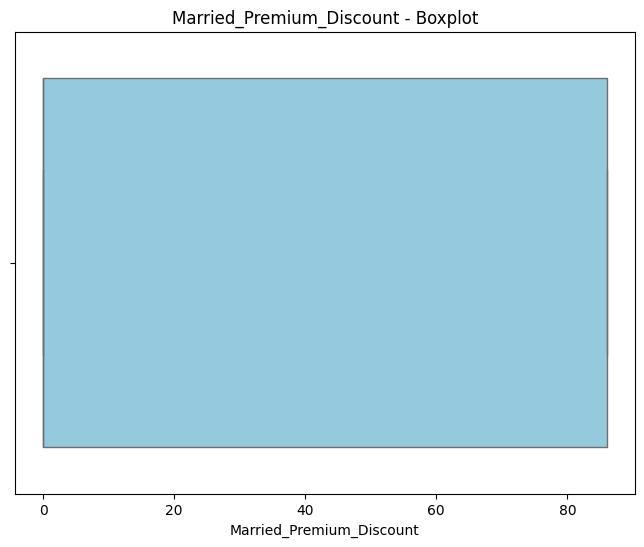

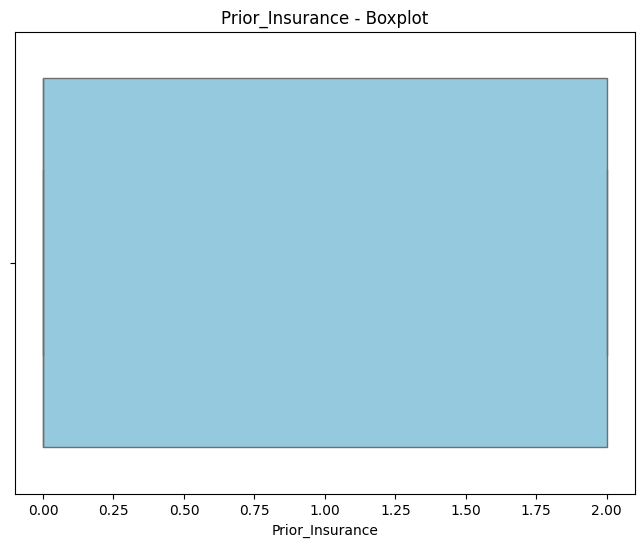

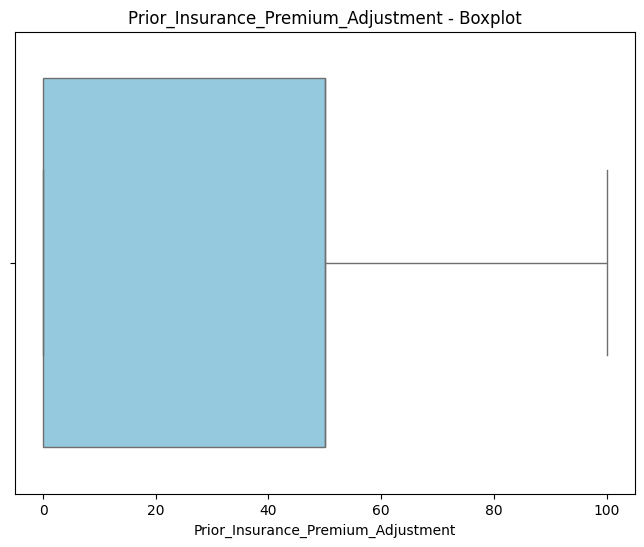

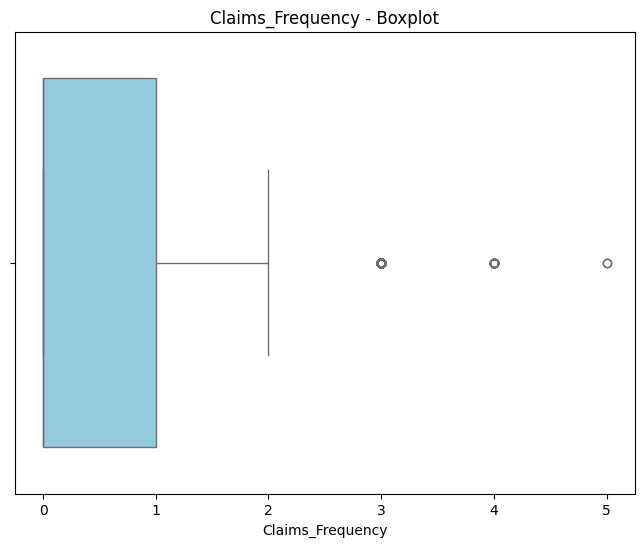

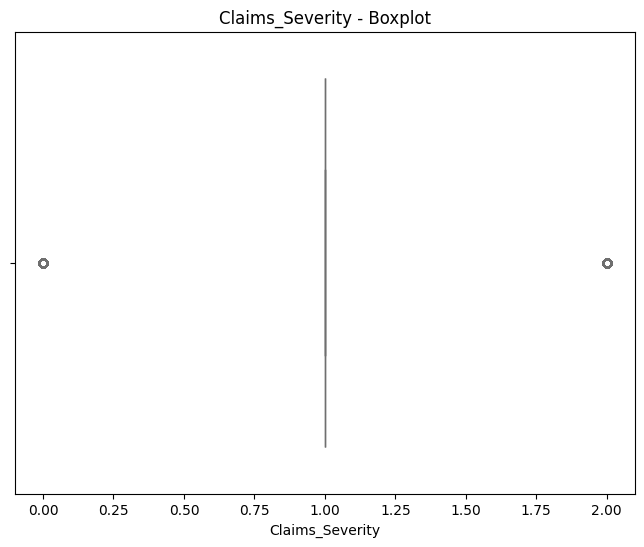

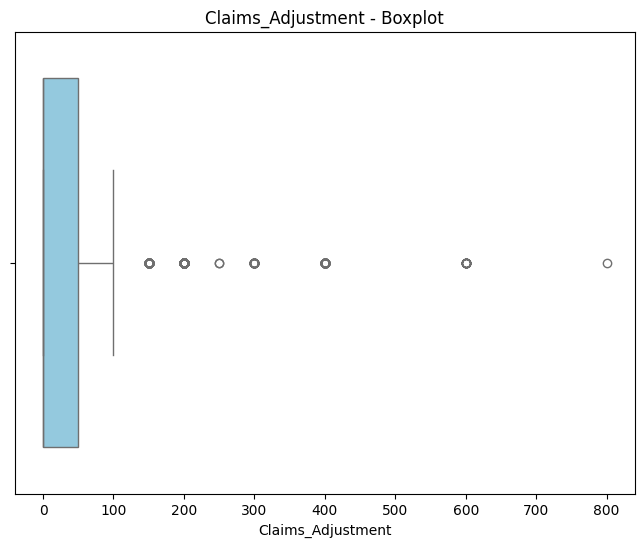

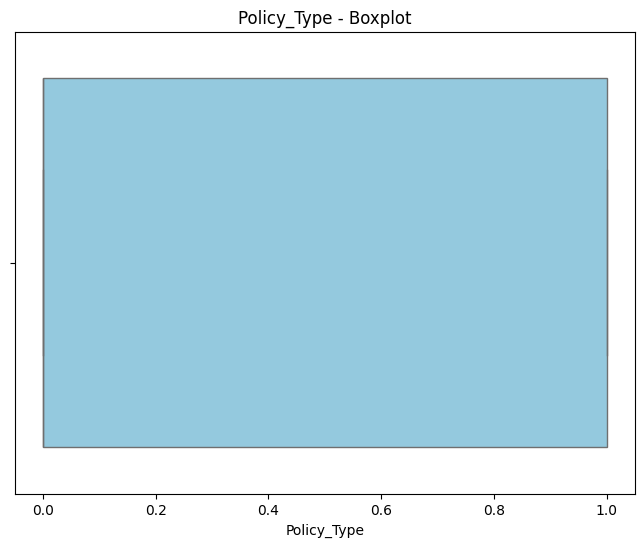

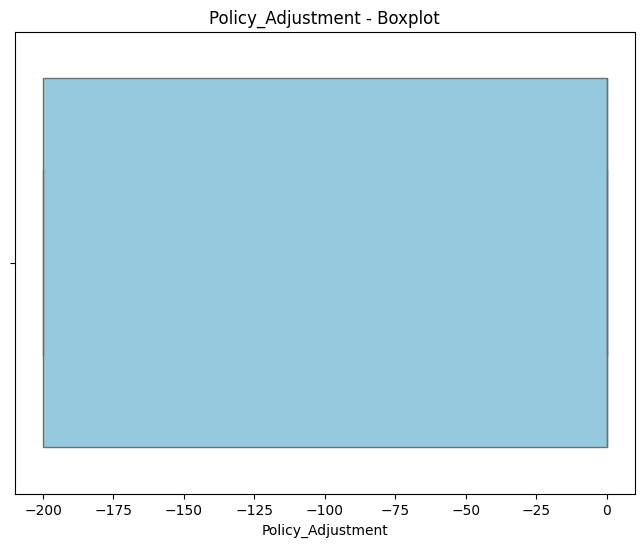

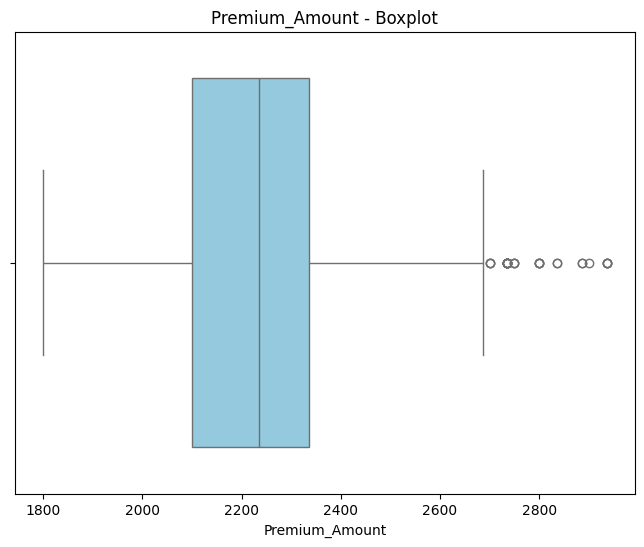

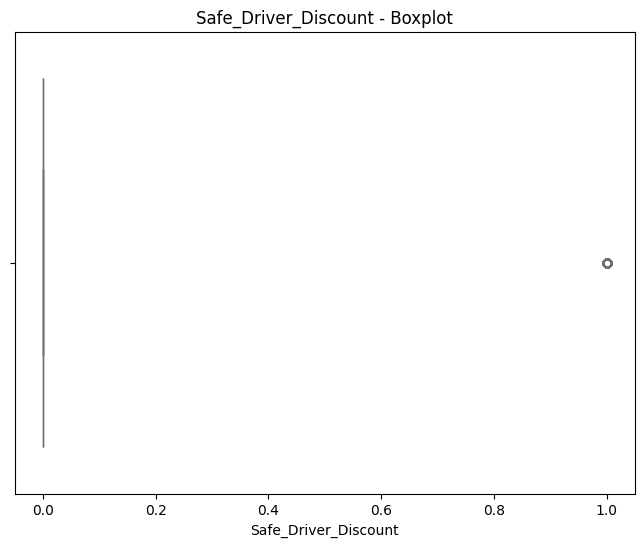

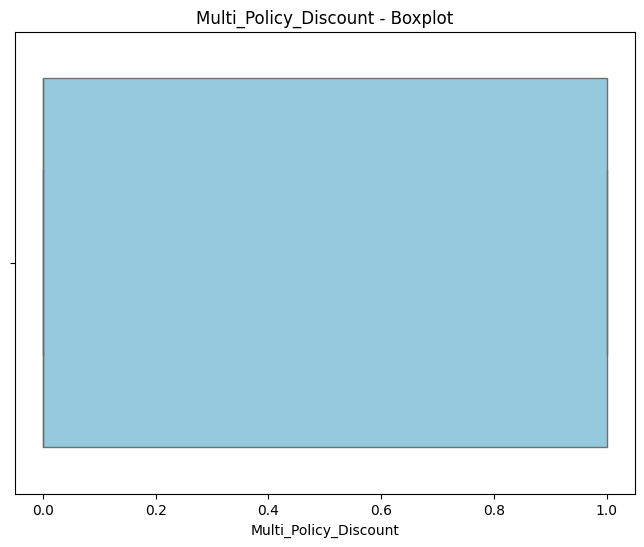

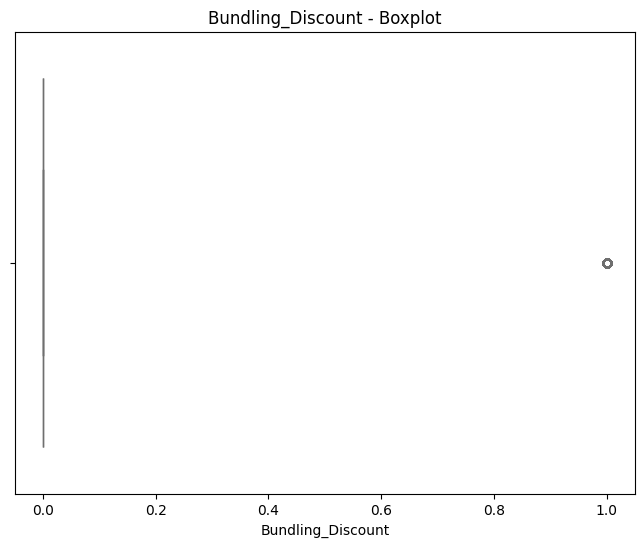

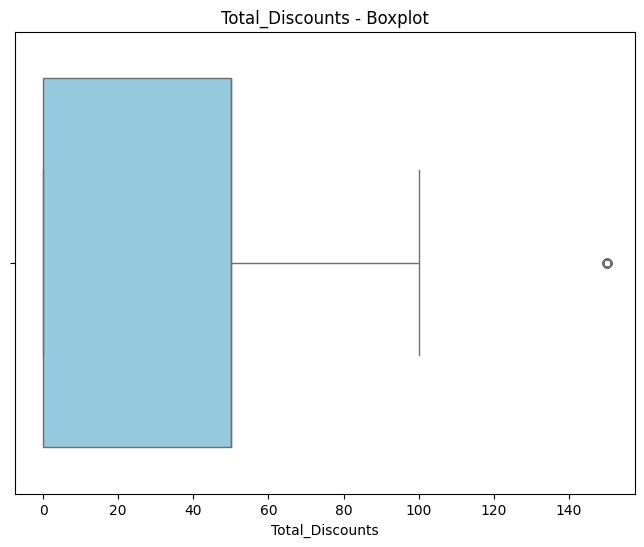

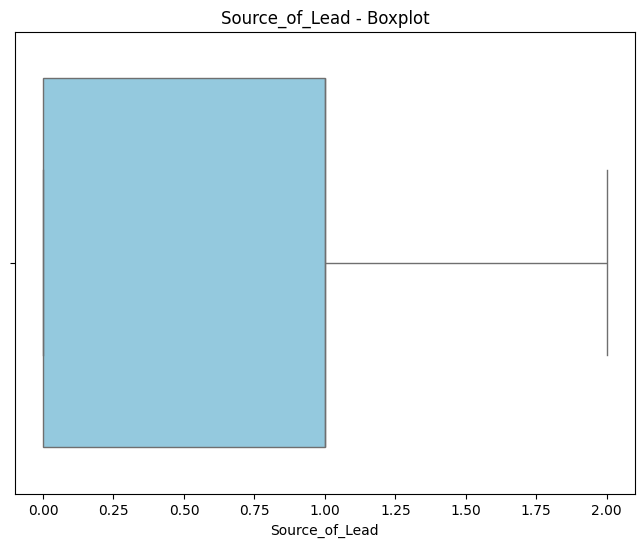

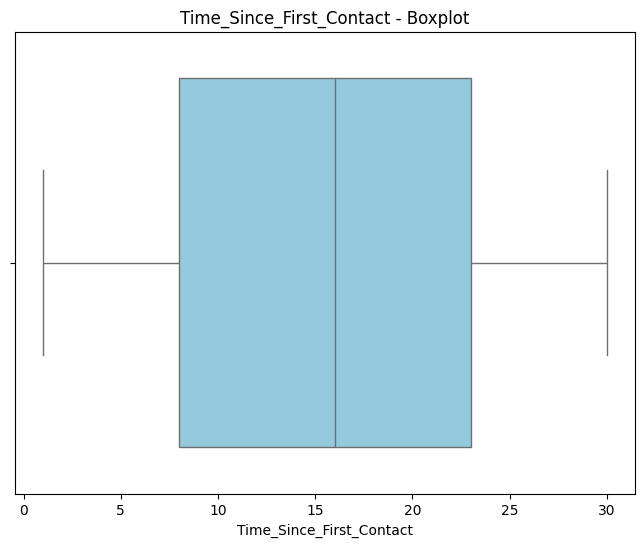

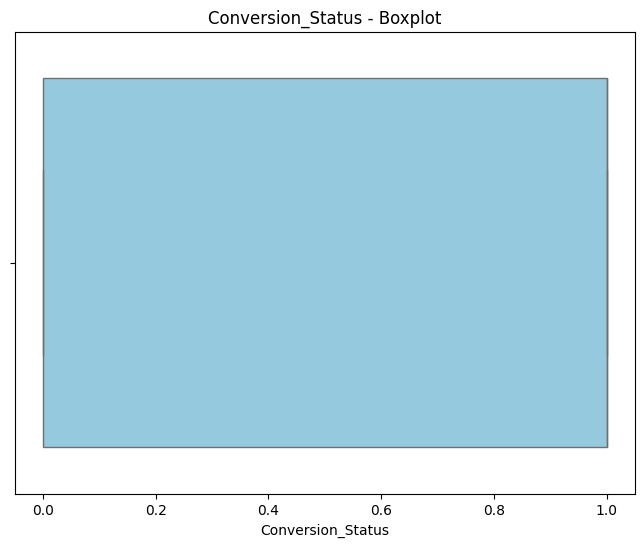

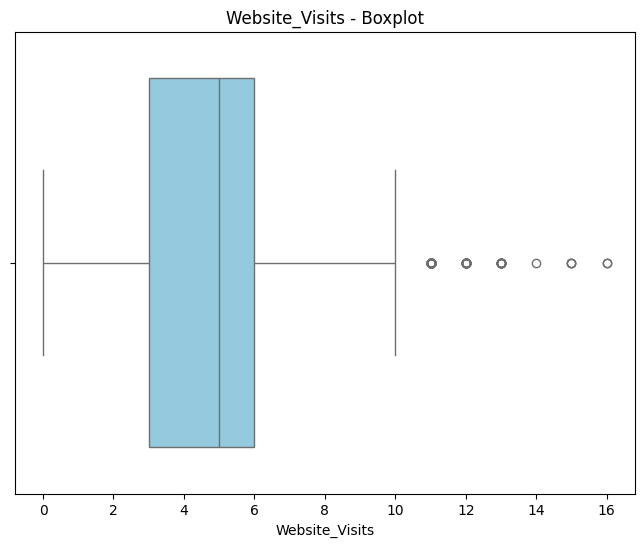

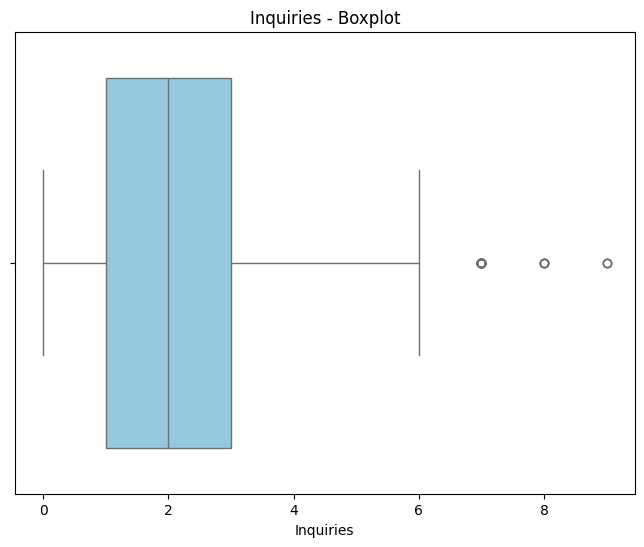

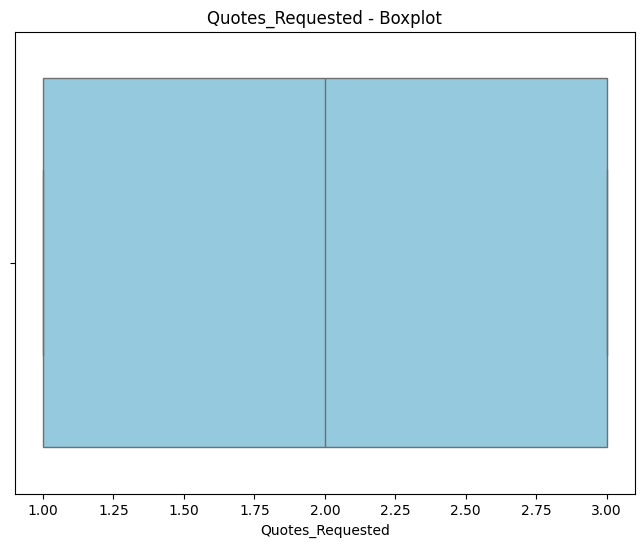

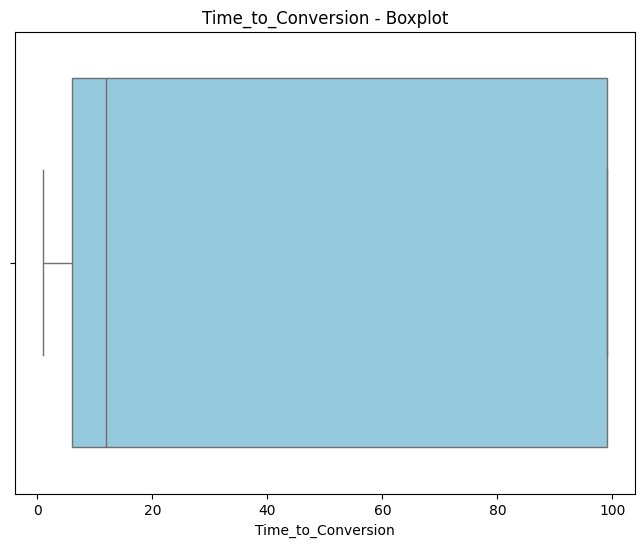

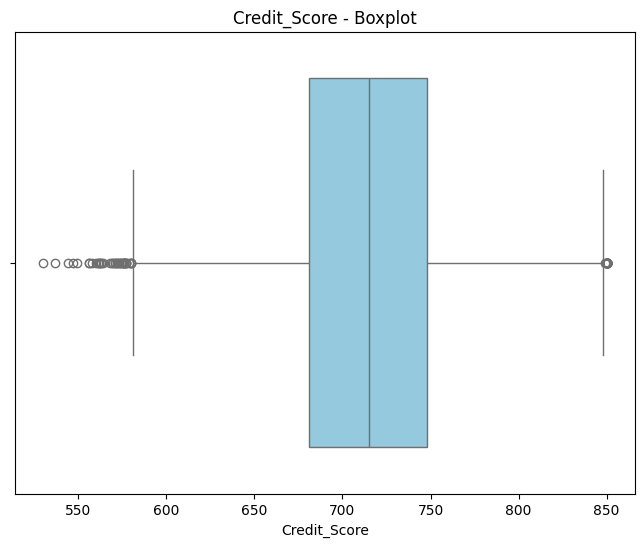

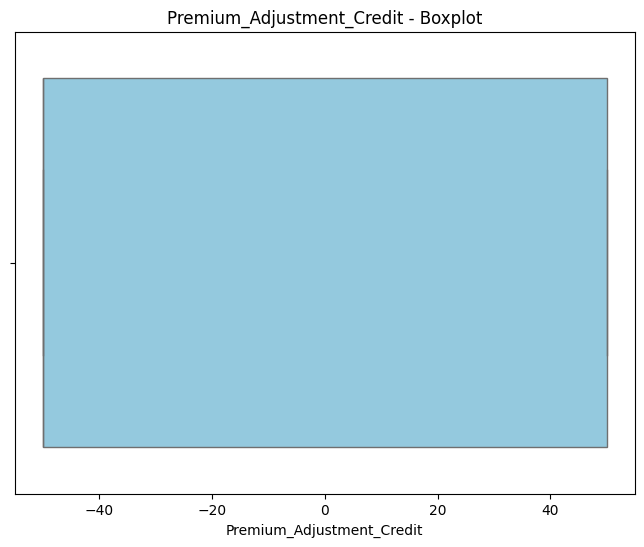

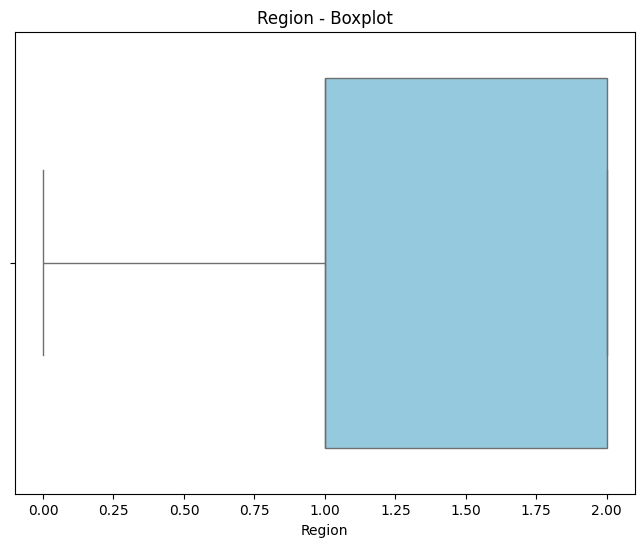

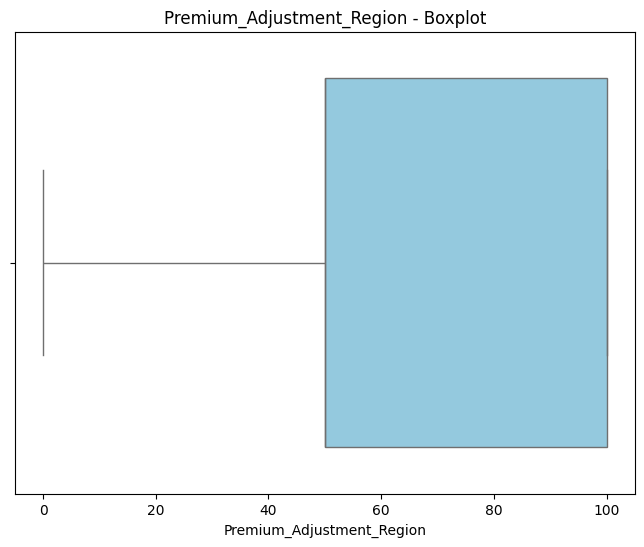

In [10]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[col], color='skyblue')
    plt.title(f'{col} - Boxplot')
    plt.xlabel(col)
    plt.show()

# Removing Outliers

In [11]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# Drop unwanted columns

In [13]:
data=data.drop(["Is_Senior","Prior_Insurance","Claims_Severity","Prior_Insurance_Premium_Adjustment","Safe_Driver_Discount","Bundling_Discount"],axis=1)

<Axes: >

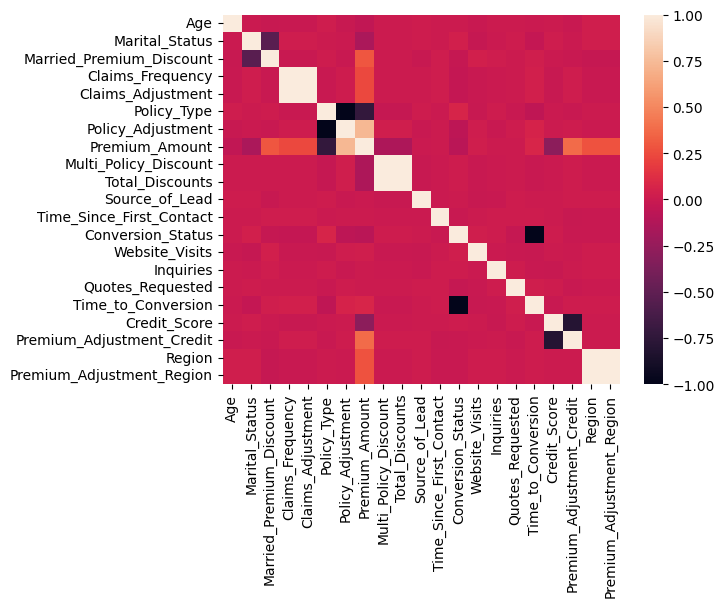

In [14]:
sns.heatmap(data.corr())

In [18]:
x=data.drop(["Conversion_Status"],axis=1)
y=data["Conversion_Status"]

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

# Models

In [21]:
classifier={
    "Logistic Regression":LogisticRegression(),
    "Random Forest Classifier":RandomForestClassifier(),
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "Ada Boost Classifier":AdaBoostClassifier()
}

In [22]:
for name,clf in classifier.items():
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    print(f"{name}")
    print(f"{accuracy*100}")
    print(classification_report(y_test,y_pred))

Logistic Regression
100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       333
           1       1.00      1.00      1.00       491

    accuracy                           1.00       824
   macro avg       1.00      1.00      1.00       824
weighted avg       1.00      1.00      1.00       824

Random Forest Classifier
100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       333
           1       1.00      1.00      1.00       491

    accuracy                           1.00       824
   macro avg       1.00      1.00      1.00       824
weighted avg       1.00      1.00      1.00       824

Decision Tree Classifier
100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       333
           1       1.00      1.00      1.00       491

    accuracy                           1.00       824
   macro avg       1.00      1.00      1

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


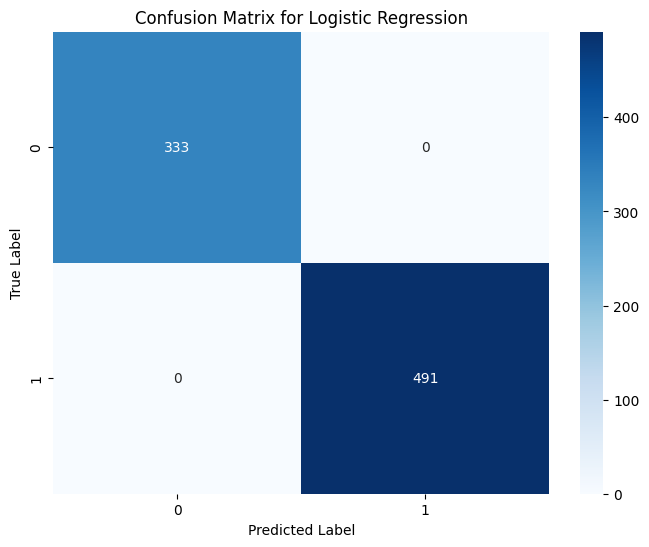

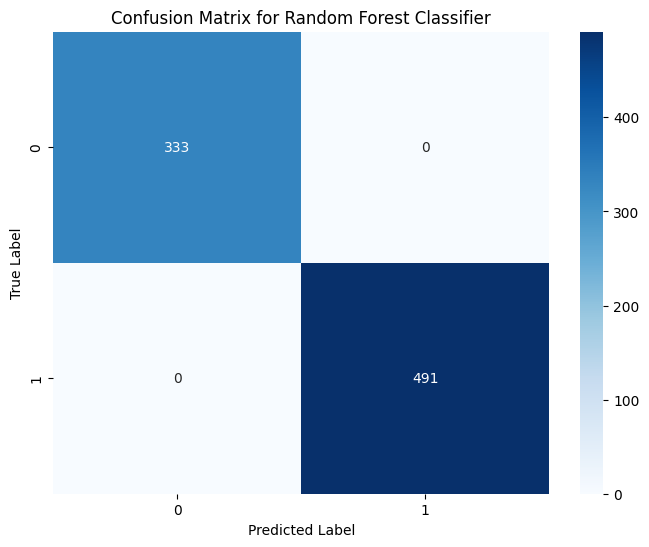

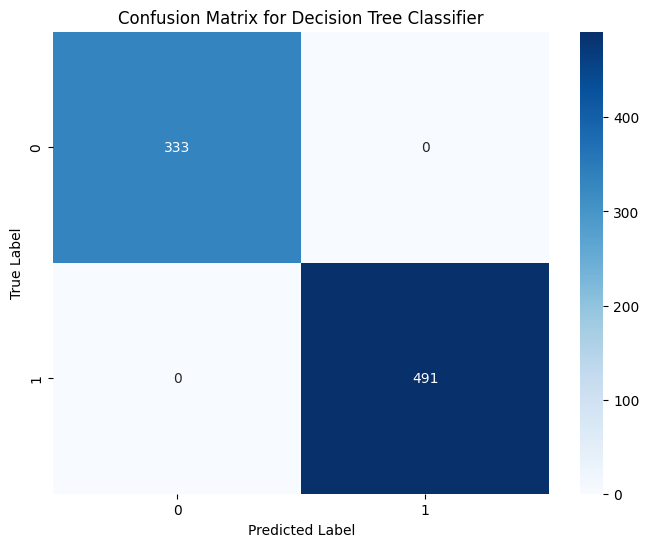

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


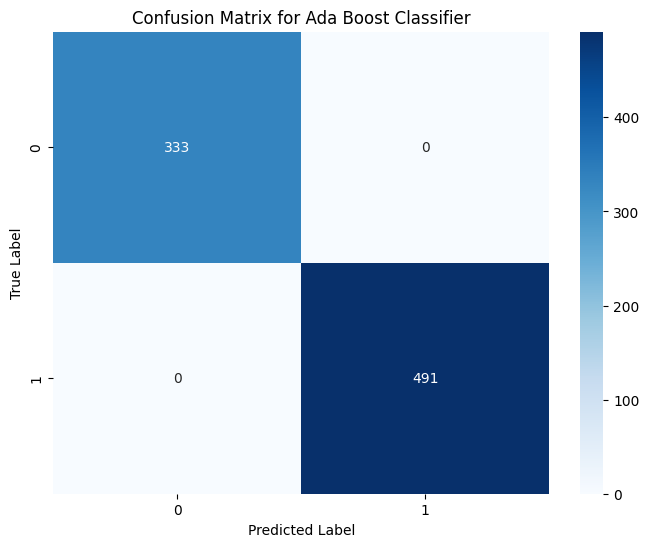

In [23]:
accuracy_results={}
for name,clf in classifier.items():
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    accuracy_results[name]=accuracy
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [24]:
result={
    "Model":["Logistic Regression","Random Forest Classifier","Decision Tree Classifier","Ada Boost Classifier"],
    "Accuracy":[100,100,100,100]
}

In [25]:
result_df=pd.DataFrame(result)

# Results

/var/folders/km/41xdld515hq8qyv7nx3qq6n80000gn/T/ipykernel_19085/236552040.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model",y="Accuracy",data=result_df,palette="colorblind")


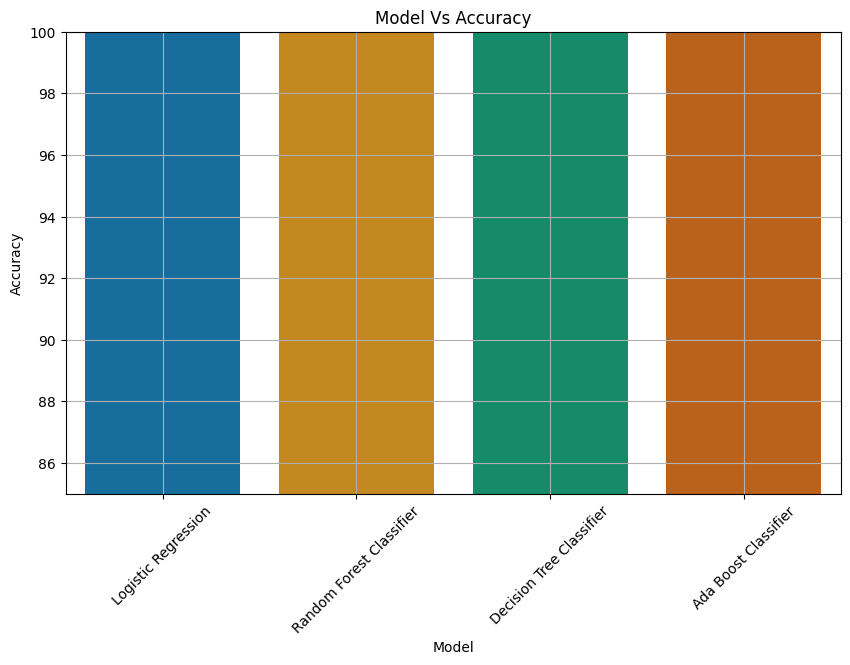

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(x="Model",y="Accuracy",data=result_df,palette="colorblind")
plt.ylim(85,100)
plt.title("Model Vs Accuracy")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()